In [1]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [2]:
non_perturbed_deck = 'standard'
decks = [
    'batman_joker',
    'captain_america',
    'adversarial_standard',
    'adversarial_batman_joker',
    'adversarial_captain_america'
] 
noise_pcts = [10,20,30,40,50,60,70,80,90,100]
FONT_SIZE=14
TICK_FONT_SIZE=14
mpl.rcParams['xtick.labelsize'] = TICK_FONT_SIZE
mpl.rcParams['ytick.labelsize'] = TICK_FONT_SIZE

In [3]:
def get_baseline_results(method, deck, data_size='small'):
    # need to build array of results for noise pcts
    num_preds = []
    num_preds_stds = []
    
    # get standard
    np_0 = json.loads(open('../'+method+'/'+data_size+'/standard.json').read())
    num_preds.append(np_0['noise_pct_0']['interpretability']['num_predicates']['mean'])
    num_preds_stds.append(np_0['noise_pct_0']['interpretability']['num_predicates']['std_err'])
    
    # other noise pcts
    np_res = json.loads(open('../'+method+'/'+data_size+'/'+deck+'.json').read())
    np_res_extra = json.loads(open('../'+method+'/'+data_size+'/'+deck+'_extra.json').read())
    for n in noise_pcts:
        if n > 90:
            num_preds.append(np_res_extra['noise_pct_'+str(n)]['interpretability']['num_predicates']['mean'])
            num_preds_stds.append(np_res_extra['noise_pct_'+str(n)]['interpretability']['num_predicates']['std_err'])
        else:
            num_preds.append(np_res['noise_pct_'+str(n)]['interpretability']['num_predicates']['mean'])
            num_preds_stds.append(np_res['noise_pct_'+str(n)]['interpretability']['num_predicates']['std_err'])
    return num_preds, num_preds_stds

In [4]:
def get_nsl_results(net_type, deck):        
    # need to build array of results for noise pcts
    num_preds = []
    num_preds_stds = []
    
    # get standard
    np_0 = json.loads(open('../nsl/structured_test_data/'+net_type+'/standard.json').read())
    num_preds.append(np_0['noise_pct_0']['interpretability']['num_predicates']['mean'])
    num_preds_stds.append(np_0['noise_pct_0']['interpretability']['num_predicates']['std_err'])
    
    # other noise pcts
    np_res = json.loads(open('../nsl/structured_test_data/'+net_type+'/'+deck+'.json').read()) 

    for n in noise_pcts:
        num_preds.append(np_res['noise_pct_'+str(n)]['interpretability']['num_predicates']['mean'])
        num_preds_stds.append(np_res['noise_pct_'+str(n)]['interpretability']['num_predicates']['std_err'])
    return num_preds, num_preds_stds

In [5]:
def get_pct_symbolic_perturbs(net_type, deck):
    def format_pct(x):
        return math.floor(x*100)
    pcts = []
    # get standard
    std_perturbs = json.loads(open('../mislabelled_example_analysis/'+net_type+'/standard.json').read())
    pcts.append(format_pct(std_perturbs['noise_pct_0']['pct_incorrect_examples']))
    pct_symbolic_perturbs = json.loads(open('../mislabelled_example_analysis/'+net_type+'/'+deck+'.json').read())
    for n in noise_pcts:
        pcts.append(format_pct(pct_symbolic_perturbs['noise_pct_'+str(n)]['pct_incorrect_examples']))
    return pcts

# Interpretability

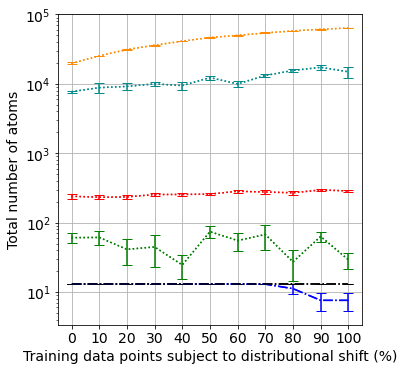

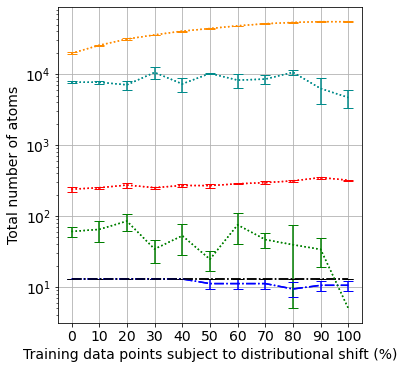

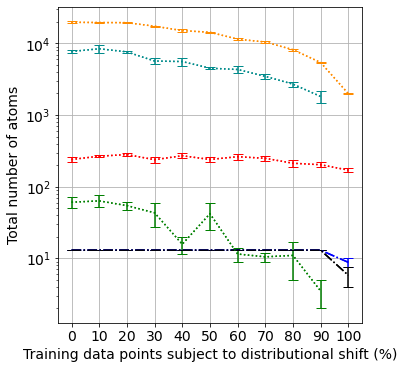

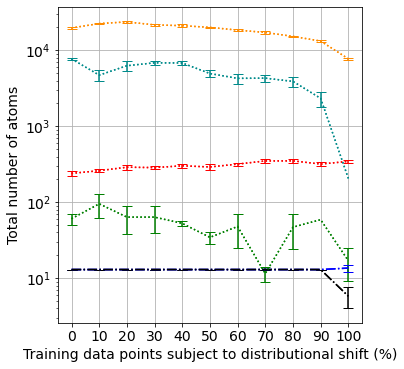

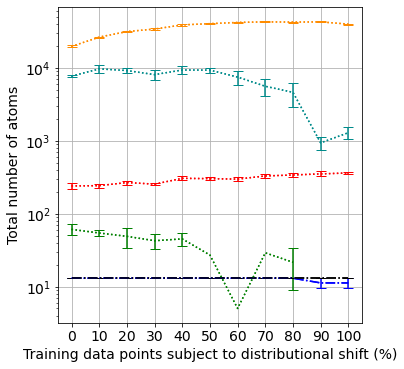

In [6]:
# fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
# spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
# f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])
# f2_ax3 = fig2.add_subplot(spec2[0, 2])
# f2_ax4 = fig2.add_subplot(spec2[1, 0])
# f2_ax5 = fig2.add_subplot(spec2[1, 1])
# f2_ax6 = fig2.add_subplot(spec2[1, 2])
# 
# axes = [f2_ax1, f2_ax2, f2_ax3, f2_ax4, f2_ax5]

nps_x = [0]+noise_pcts
for i in range(5):
    
    fig2 = plt.figure(constrained_layout=True, figsize=(5,5))
    axes = plt.gca()
    
    # NSL
    nsl, nsl_err = get_nsl_results('softmax', decks[i])
    axes.plot(nps_x, nsl, label = "NSL Softmax 104 examples", color="b", linestyle='-.')
    axes.errorbar(nps_x, nsl, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    nsl, nsl_err = get_nsl_results('edl_gen', decks[i])
    axes.plot(nps_x, nsl, label = "NSL EDL-GEN 104 examples", color="k", linestyle='-.')
    axes.errorbar(nps_x, nsl, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    # Random Forest Small
    rf, rf_err = get_baseline_results('rf', decks[i])
    axes.plot(nps_x, rf, label = "Baseline RF 104 examples", color="r", linestyle=':')
    axes.errorbar(nps_x, rf, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
    # Random Forest Large
    rf, rf_err = get_baseline_results('rf', decks[i], data_size='large')
    axes.plot(nps_x, rf, label = "Baseline RF 10,400 examples", color="darkorange", linestyle=':')
    axes.errorbar(nps_x, rf, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
    # FCN Small
    fcn, fcn_err = get_baseline_results('fcn', decks[i])
    axes.plot(nps_x, fcn, label = "Baseline FCN 104 examples", color="g", linestyle=':')
    axes.errorbar(nps_x, fcn, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
    # FCN Large
    fcn, fcn_err = get_baseline_results('fcn', decks[i], data_size='large')
    axes.plot(nps_x, fcn, label = "Baseline FCN 10,400 examples", color="darkcyan", linestyle=':')
    axes.errorbar(nps_x, fcn, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')
    
    # Twin Axes to denote pct symbolic perturbations
#     pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', decks[i])
#     pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', decks[i])
#     ax2 = axes.twiny()
    
    axes.set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes.set_xlabel('Training data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes.set_ylabel('Total number of atoms', fontsize=FONT_SIZE)
    axes.set_yscale('log')
#     axes.set_title(decks[i])
    axes.grid(True)
    
    
#     ax2.set_xticks(nps_x)
#     ax2.set_xticklabels(pct_symbolic_perturbs_softmax)
#     ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax2.spines['bottom'].set_position(('outward', 40))
#     ax2.set_xlabel('Pct examples with incorrect labels post feature extraction: Softmax (%)')
#     ax2.set_xlim(axes[i].get_xlim())
    
#     ax3 = axes[i].twiny()
#     ax3.set_xticks(nps_x)
#     ax3.set_xticklabels(pct_symbolic_perturbs_edl_gen)
#     ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax3.spines['bottom'].set_position(('outward', 80))
#     ax3.set_xlabel('Pct examples with incorrect labels post feature extraction: EDL-GEN (%)')
#     ax3.set_xlim(axes[i].get_xlim())
    plt.savefig('interpretability/'+decks[i]+'_follow_suit_interpretability_results.pdf', format='pdf', bbox_inches='tight')

    
# # Set legend
# f2_ax6.legend(*axes[0].get_legend_handles_labels(), loc='center')
# f2_ax6.get_xaxis().set_visible(False)
# f2_ax6.get_yaxis().set_visible(False)
# f2_ax6.set_title('Legend')
# plt.savefig('follow_suit_interpretability_results.pdf', format='pdf', bbox_inches='tight')
# plt.show()